## Getting Data

In [1]:
import pandas as pd
import random

In [2]:
# Dataset source: https://huggingface.co/datasets/ronaldahmed/scitechnews
df = pd.read_json('data/train.json', lines=True)
df

,id,pr-title,pr-article,pr-summary,sc-title,sc-abstract,sc-section_names,sc-sections,sc-article,sc-authors
0,0,New York City's Vaccine Passport Plan Renews O...,When New York City announced on Tuesday that i...,New York's City's mandate that people must sho...,,,[],[],,[]
1,1,Facebook Disables Accounts Tied to NYU Researc...,Facebook Inc. has disabled the personal accoun...,Facebook has disabled the personal accounts of...,,,[],[],,[]
2,2,Teenage Girls in Northern Nigeria 'Open Their ...,"KANO, Nigeria, Aug 2 (Reuters) - Teenage girls...",The Kabara non-governmental organization (NGO)...,,,[],[],,[]
3,3,3D 'Heat Map' Animation Shows How Seizures Spr...,"For 29 years, from the time she was 12, Rashet...","University of California, San Francisco (UCSF)...",,,[],[],,[]
4,4,Endlessly Changing Playground Teaches AIs to M...,What did they learn? Some of DeepMind's XLand ...,Alphabet's DeepMind Technologies has developed...,,,[],[],,[]
...,...,...,...,...,...,...,...,...,...,...
26633,29065,Young People Get Their Knowledge of Tech From ...,,"A survey of 1,000 16- to 21-year-olds in the U...",,,[],[],,[]
26634,29067,TUM Team ASIC Implements Post-Quantum Cryptogr...,,A team of researchers at Germany's Technical U...,,,[],[],,[]
26635,29070,3D Concrete Printing Robots Cut Rail Construct...,,Britain will employ robotic three-dimensionall...,,,[],[],,[]
26636,6496,'Listening' Drone Helps Find Victims Needing R...,As part of the ImPACT Tough Robotics Challenge...,Researchers in Japan say they have developed t...,,,[],[],,[]


In [3]:
df = df[['pr-title', 'pr-article']]
df

,pr-title,pr-article
0,New York City's Vaccine Passport Plan Renews O...,When New York City announced on Tuesday that i...
1,Facebook Disables Accounts Tied to NYU Researc...,Facebook Inc. has disabled the personal accoun...
2,Teenage Girls in Northern Nigeria 'Open Their ...,"KANO, Nigeria, Aug 2 (Reuters) - Teenage girls..."
3,3D 'Heat Map' Animation Shows How Seizures Spr...,"For 29 years, from the time she was 12, Rashet..."
4,Endlessly Changing Playground Teaches AIs to M...,What did they learn? Some of DeepMind's XLand ...
...,...,...
26633,Young People Get Their Knowledge of Tech From ...,
26634,TUM Team ASIC Implements Post-Quantum Cryptogr...,
26635,3D Concrete Printing Robots Cut Rail Construct...,
26636,'Listening' Drone Helps Find Victims Needing R...,As part of the ImPACT Tough Robotics Challenge...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26638 entries, 0 to 26637
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pr-title    26638 non-null  object
 1   pr-article  26638 non-null  object
dtypes: object(2)
memory usage: 416.3+ KB


In [5]:
df = df[df['pr-article'] != '']
print('Train dataframe size without blanks: ', len(df))

Train dataframe size without blanks:  12735


In [6]:
random_article_idx = random.randint(0, len(df))
row = df.iloc[random_article_idx]
print('News example: ', random_article_idx)
print('Title:    \n', row['pr-title'])
print('Article:  \n', row['pr-article'])

News example:  8675
Title:    
 I School 'Drone Lab' Reimagines Drones' Possibilities
Article:  
 Don't be surprised if you hear a buzzing sound in the hallways of South Hall this semester; it's the sound of the future, in the form of small student-piloted unmanned aerial vehicles, or drones.
This semester, a small team of School of Information students is experimenting with drones: becoming familiar with drones' capabilities and imagining their future applications. The eight students, who call their group the "Drone Lab," are working together in a South Hall classroom to develop open-source software for their drones and then testing them in the classroom, in the building's atrium, and (occasionally) on the South Hall lawn.
"Drones have a pretty bad reputation," admitted Dave Lester, a second-year MIMS student; when most people hear the word "drone," they imagine high-tech killing machines or government surveillance. "We're trying to do something a little different in Drone Lab," said 

In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

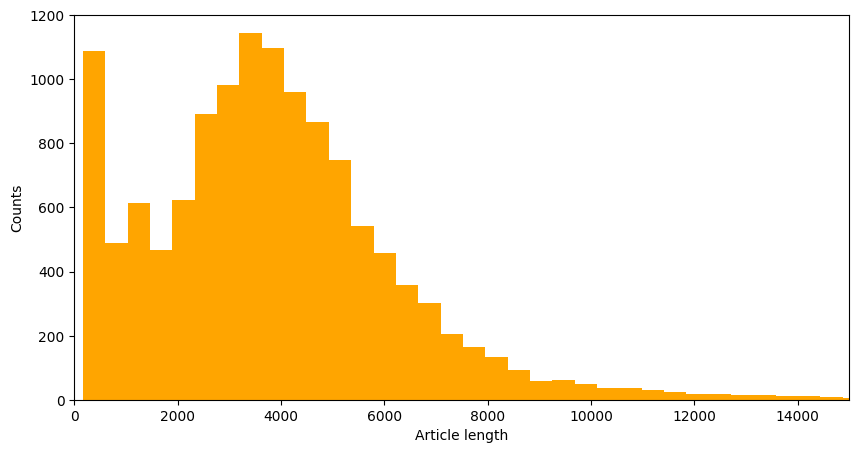

In [8]:
article_lengths = df['pr-article'].str.len()

plt.figure(figsize=(10, 5))
plt.hist(article_lengths, bins=150, color='orange')
plt.xlim(0, 15000)
plt.xlabel('Article length')
plt.ylabel('Counts')

## Predicting Science articles titles with T5 Summarization

In [9]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config
import torch

display_model_info = 1

model_name = "t5-large"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [10]:
model = T5ForConditionalGeneration.from_pretrained(model_name).to(device)
model.eval()
tokenizer = T5Tokenizer.from_pretrained(model_name)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [11]:
if display_model_info:
    print(model)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=4096, bias=False)
              (wo): Linear(in_features=4096, out_features=1024, bias=False)
              (d

Model presents 24x Encoder blocks and 24x Decoder blocks.

In [12]:
if display_model_info:
    print(model.config)

T5Config {
  "_attn_implementation_autoset": true,
  "_name_or_path": "t5-large",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 4096,
  "d_kv": 64,
  "d_model": 1024,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 24,
  "num_heads": 16,
  "num_layers": 24,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_sto

In [13]:
special_tokens = tokenizer.special_tokens_map
special_tokens.pop('additional_special_tokens')
print(special_tokens)

{'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>'}


In [14]:
import textwrap

In [15]:
def get_title_for_news(article, max_length=30, min_length=5, trim_period=True):
    t5_input = "summarize: " + article# + " </s>"
    tokenized_t5_input = tokenizer.encode(t5_input,
                                          return_tensors="pt",
                                          truncation=True,
                                          max_length=model.config.n_positions
                                          ).to(device)
    title_ids = model.generate(tokenized_t5_input,
                               max_length=max_length,
                               min_length=min_length,
                               num_beams=4,
                               early_stopping=True)
    title = tokenizer.decode(title_ids[0], skip_special_tokens=True)
    if trim_period:
        titles = title.split('.')
        title = titles[0]
    return title

In [16]:
def print_article_titles(article_idx):
    article = df['pr-article'].iloc[article_idx]
    official_title = df['pr-title'].iloc[article_idx]

    print('Article:')
    print(textwrap.fill(article, 120, initial_indent='    ', subsequent_indent='    '))
    print('\nOfficial title:')
    print(textwrap.fill(official_title, 120, initial_indent='    ', subsequent_indent='    '))

    model_title = get_title_for_news(article,
                                     min_length=5,
                                     max_length=30)

    print('\nModel title:')
    print(textwrap.fill(model_title, 120, initial_indent='    ', subsequent_indent='    '))


In [17]:
print_article_titles(500)

Article:
    More than half of IT workers in the UK and Ireland say their companies are trying to tackle gender diversity in IT
    departments, according to research by Computer Weekly. The annual Computer Weekly/TechTarget IT salary survey asked
    IT workers which topics related to diversity their IT departments were working to address in 2020 and found 67% said
    their firms were working on gender diversity . But only 29% said their company had a plan in place to help improve
    the balance of men and women in their tech teams. Ruth Blanco, communications director for WISE, the campaign for
    greater gender balance in science, technology, engineering and mathematics (STEM), which has resources available to
    help companies address diversity better, said: "While it is reassuring that the majority of IT workers say gender
    diversity is something their workplace is addressing, it is telling that only 29% say there is a plan in place. We
    know that diversity and inclusion

In [18]:
print_article_titles(1310)

Article:
    "Pre-pandemic, people might have thought we were automating too much," said Richard Pak, a professor at Clemson
    University who researches the psychological factors around automation. "This event is going to push people to think
    what more should be automated." The grocery industry is leaning more on automation to free up employees to deal with
    the crush of demand during the pandemic. Brain Corp, a San Diego company that makes software used in automated floor
    cleaners, said retailers were using the cleaners 13 percent more than they were just two months ago. The "autonomous
    floor care robots" are doing about 8,000 hours of daily work "that otherwise would have been done by an essential
    worker," the company said.

Official title:
    Robots Welcome to Take Over, as Pandemic Accelerates Automation

Model title:
    "pre-pandemic, people might have thought we were automating too much," professor says


In [19]:
print_article_titles(1106)

Article:
    As people age, cognitive decline can happen in subtle ways that are not always immediately obvious to family members
    or friends. One solution for better detecting these subtle changes, however, could already be in the homes of many
    people, in the form of a smart home device. In a recent study , researchers demonstrate that it's possible to use
    data from smart home devices to detect behavioral differences between people who are experiencing cognitive decline
    and healthy individuals. The results, which could have broader implications for the monitoring of many different
    health conditions, were published 3 June in IEEE Journal of Biomedical and Health Informatics . Gina Sprint, an
    Assistant Professor of Computer Science at Gonzaga University, is one of the researchers involved in the study.
    Sprint and her collaborators at Washington State University developed a novel algorithm for analyzing data from
    smart home devices; it's called Behavior Cha

Down here the models predicts something wrong until the first period:

In [20]:
print_article_titles(2002)

Article:
    Advocates for closing the gender gap in computer science say part of the solution isn't necessarily increasing the
    number of classes that K-12 schools offer - it's getting districts to report who's taking them. The nonprofit Girls
    Who Code is working with Sen. Jacky Rosen (D-Nev.) on legislation that would require schools receiving federal
    funding for computer science programs to disclose to the Department of Education the number and percentage of
    students who participate in computer science courses, as well as their gender, race and other demographic
    information. With that transparency, it becomes more clear who's signing up for classes that lay the groundwork for
    careers in technology - and whether federal grant programs are making a difference. The broader aim is to help girls
    think of themselves as smart at science and tech, defying preconceived notions. "We have open jobs. If we don't work
    harder to include women in tech ... there's no 

In [21]:
print_article_titles(2004)

Article:
    Annie Slattery's start-up ConX connects contractors in the construction industry online and enables them to find
    work. Annie Slattery, an entrepreneur who is originally from Clontarf in north Dublin, has received a top award in
    Australia for women in tech start-ups. Slattery was presented with the award at Hopper Down Under, which was held in
    Australia for the first time last week. The event is part of the Grace Hopper Celebration , which is named after
    computer scientist Grace Hopper and is the world's largest gathering of women in computing and tech. Slattery
    received the award for her start-up ConX, which connects contractors in the construction industry online, with the
    aim of changing how construction contractors can find and win work. Siliconrepublic.com spoke to ConX's former CIO ,
    David Stenson, about the technology behind the start-up in September 2015. The award was part of a pitch
    competition, which saw more than 100 women pitchin

In [22]:
new_row = {'pr-article': """
                Before dinosaurs walked the Earth and tens of millions of years before the first mammals appeared, distant mammal relatives with long, serrated canine teeth were the dominant carnivores on land. Called gorgonopsians, the earliest animals in this lineage have long been missing from the fossil record. But the discovery of a newly identified gorgonopsian — the oldest saber-toothed animal ever found — is filling a longstanding blank space in the group’s history.

These slender predators are known mostly from bones that are less than 270 million years old, but the recent fossil find is thought to be an unprecedented 280 million to 270 million years old.

The frozen mummy of <em>Homotherium latidens</em> (Owen, 1846), specimen DMF AS RS, no. Met-20-1, Russia, Republic of Sakha (Yakutia), Indigirka River basin, Badyarikha River; Upper Pleistocene: (A) external appearance; (B) skeleton, CT-scan, dorsal view.
Related article
Baby saber-toothed cat mummy found in Siberia with intact skin, fur and toes is ‘mind-blowing,’ scientists say

The newfound gorgonopsian adds to one of the earliest branches of the therapsid family tree — the Therapsida order includes not only gorgonopsians but also the ancestors of modern mammals and other nonmammalian groups that are now extinct.

The finding is a notable puzzle piece that could help shed light on the earliest forebears of mammals, experts said.

What is a gorgonopsian? It’s not a ‘lizard-dog’
Gorgonopsians vanished around 252 million years ago, and their lineage died with them. All gorgonopsians had daggerlike canine teeth, and species ranged widely in size. Some were as small as cats, while others were as big as polar bears.

Fossils of the newly described gorgonopsian included its knifelike canines; parts of its jaw; some vertebrae, ribs, tailbones and toe bones; and most of the bones from a hind limb, researchers reported Tuesday in the journal Nature Communications.

The specimen’s blunt-snouted skull was incomplete but is estimated to measure about 7 inches (18 centimeters) long, and the animal would have been as tall as a medium-size dog and weighed roughly 66 to 88 pounds (30 to 40 kilograms), according to study coauthor Ken Angielczyk, MacArthur Curator of Paleomammalogy at Chicago’s Field Museum of Natural History.

An illustration of the newly described gorgonopsian shows the fossils that were found: knifelike canines; parts of its jaw; some vertebrae, ribs, tailbones and toe bones; and most of the bones from a hind limb.
An illustration of the newly described gorgonopsian shows the fossils that were found: knifelike canines; parts of its jaw; some vertebrae, ribs, tailbones and toe bones; and most of the bones from a hind limb. Matamales-Andreu et al, illustration by Eudald Mujal/SMNS/Field Museum
Other than being four-legged and having a long tail, the gorgonopsian wouldn’t have looked very doglike, Angielczyk said. Similar to reptiles, gorgonopsians didn’t have fur or visible ears, he said. But although the animal physically resembled lizards in some ways, please don’t call it a “lizard-dog,” he told CNN.

“Lizards are a kind of reptile, and nonmammalian therapsids like gorgonopsians are part of a completely different evolutionary lineage, part of the lineage that includes mammals,” Angielczyk said. “While mammals and reptiles share a common ancestor that lived about 320 million years ago, they are separate lines of descent.”

Coprolites from the Early Jurassic of Soltykow, Poland: Coprolites of herbivorous dinosaurs with numerous plant remains.
Related article
Fossilized poop reveals secrets of how dinosaurs came to dominate Earth

Gorgonopsians do share some traits with their mammal cousins. One of those is having teeth of different shapes and sizes, “with those teeth providing different roles in the feeding system,” Angielczyk said. “That’s something that’s very common in mammals today.”

Unlike mammals, gorgonopsians seemingly replaced their teeth — including their long canines — repeatedly throughout their lifetime. “Mammals today, for the most part, just have one replacement cycle of teeth,” Angielczyk said. “Whereas gorgonopsians and other therapsids generally were more like a crocodile today, where they have teeth that are erupting continuously.”

Oldest of its kind
Paleontologists discovered bones of the newfound gorgonopsian in Mallorca, a Mediterranean island that’s part of Spain, during expeditions in 2019 and 2021, said senior study author Josep Fortuny, leader of the computational biomechanics and evolution of life history research group at the Miquel Crusafont Catalan Institute of Paleontology in Spain.

“The most interesting thing about the specific specimen that we describe is its age. It is pretty certainly the oldest known gorgonopsian” as well as the oldest known therapsid to date, Fortuny told CNN in an email.

A cast of the gorgonopsian's ribs (upper left), leg (right) and foot bones is seen.
A cast of the gorgonopsian's ribs (upper left), leg (right) and foot bones is seen. Anna Solé/Institut Català de Paleontologia Miquel Crusafont
“There is a big time gap in the fossil record of therapsids, between when they are predicted to have evolved based on our knowledge of relationships of synapsids (a larger vertebrate group that includes therapsids) and when they actually show up in the fossil record,” Fortuny said.

Scientists have previously calculated that therapsid fossils should start showing up in rocks that are about 300 million years old, “and we don’t actually see them, up until now, until about 270 million years ago,” Angielczyk said. The new specimen, which dates back at least to that point in time and is likely even older, aligns with that gap, helping researchers to clarify when therapsids evolved.

The search for early therapsids
Fine-tuning the evolution of therapsids during the early part of the Permian Period (299 million to 252 million years ago) is particularly important for tracing the ancestry of mammals, said Roger Benson, Macaulay Curator of Dinosaur Paleobiology at the American Museum of Natural History in New York City.

“Everything from the early Permian on the mammal line is outside of this group Therapsida, and all our knowledge of therapsids comes from the middle Permian and later,” said Benson, who was not involved in the research. “But paleontologists have long suspected there were therapsids before the middle Permian — we just didn’t find their fossils yet. This fossil is the most promising candidate for an early Permian therapsid so far.”

The location of the find was also unusual. Gorgonopsid fossils were previously known only from arid, high-latitude sites in South Africa and Russia, the study authors reported. During the Permian, Mallorca was smack in the middle of the supercontinent Pangea, which existed from 335 million to 200 million years ago. In this equatorial zone, what’s now Mallorca would have experienced very wet and very dry seasons.

Terror-bird_11_6.jpg
Related article
Ancient ‘terror birds’ were giant apex predators. Suspected new species is among the largest ever known

“One of the things people have wondered is if maybe important events in mammal ancestry took place in the tropics, and we’ve been missing fossils of these types of animals at the right age to know about that,” Benson said.

“That’s one of the intriguing implications of this fossil, is the potential that important events in mammal ancestry occurred at lower latitudes in environments that we haven’t sampled so much in the fossil record.”

Finding the oldest documented gorgonopsian in Mallorca hints that the earliest therapsid fossils are yet to be discovered in places where paleontologists previously didn’t look for them, Angielczyk said.

“It’s long been thought that the big temporal gap in the therapsid fossil record might correspond to more geographic sampling,” he said. “The fact that Mallorca is a new place for finding therapsids helps to support that idea that we’re not necessarily looking in the right places to find the first therapsids.”
                """,

               'pr-title': "Ancient saber-toothed predator found in Spain is the oldest of its kind"}

df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

In [23]:
print_article_titles(len(df) - 1)

Article:
                     Before dinosaurs walked the Earth and tens of millions of years before the first mammals appeared,
    distant mammal relatives with long, serrated canine teeth were the dominant carnivores on land. Called
    gorgonopsians, the earliest animals in this lineage have long been missing from the fossil record. But the discovery
    of a newly identified gorgonopsian — the oldest saber-toothed animal ever found — is filling a longstanding blank
    space in the group’s history.  These slender predators are known mostly from bones that are less than 270 million
    years old, but the recent fossil find is thought to be an unprecedented 280 million to 270 million years old.  The
    frozen mummy of <em>Homotherium latidens</em> (Owen, 1846), specimen DMF AS RS, no. Met-20-1, Russia, Republic of
    Sakha (Yakutia), Indigirka River basin, Badyarikha River; Upper Pleistocene: (A) external appearance; (B) skeleton,
    CT-scan, dorsal view. Related article Baby sab

In [24]:
torch.cuda.empty_cache()